<a href="https://colab.research.google.com/github/crohan009/MBRL_thesis_2020/blob/master/state_plotting_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import clear_output
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
PATH = "/content/gdrive/My Drive/Thesis/"

folder_list = os.listdir(PATH)
pred_dir_list = []
for i in range(len(folder_list)):
    if folder_list[i][:9] == "pred_data": 
        pred_dir_list.append(folder_list[i])

print(pred_dir_list)

['pred_data']


In [10]:
folder_list = os.listdir(PATH)
pred_dir_list = []
for i in range(len(folder_list)):
    if folder_list[i][:9] == "pred_data" and folder_list[i][16:20] == "2019": 
        pred_dir_list.append(folder_list[i])

print(pred_dir_list)
print(len(pred_dir_list))

[]
0


In [11]:
nul_action_results = []
for i in range(5):
    files = os.listdir(os.path.join(PATH, pred_dir_list[i]))
    print(files)
    nul_action_results.append(np.load( os.path.join(PATH, pred_dir_list[i], files[1]) ))

nul_action_actual = np.load( os.path.join(PATH, pred_dir_list[i], files[0]) )

print(nul_action_actual.shape)
print(nul_action_results[0].shape)

cos_action_results = []
for i in range(5,10):
    files = os.listdir(os.path.join(PATH, pred_dir_list[i]))
    print(files)
    cos_action_results.append(np.load( os.path.join(PATH, pred_dir_list[i], files[1]) ))

cos_action_actual = np.load( os.path.join(PATH, pred_dir_list[i], files[0]) )

print(cos_action_actual.shape)
print(cos_action_results[0].shape)

IndexError: ignored

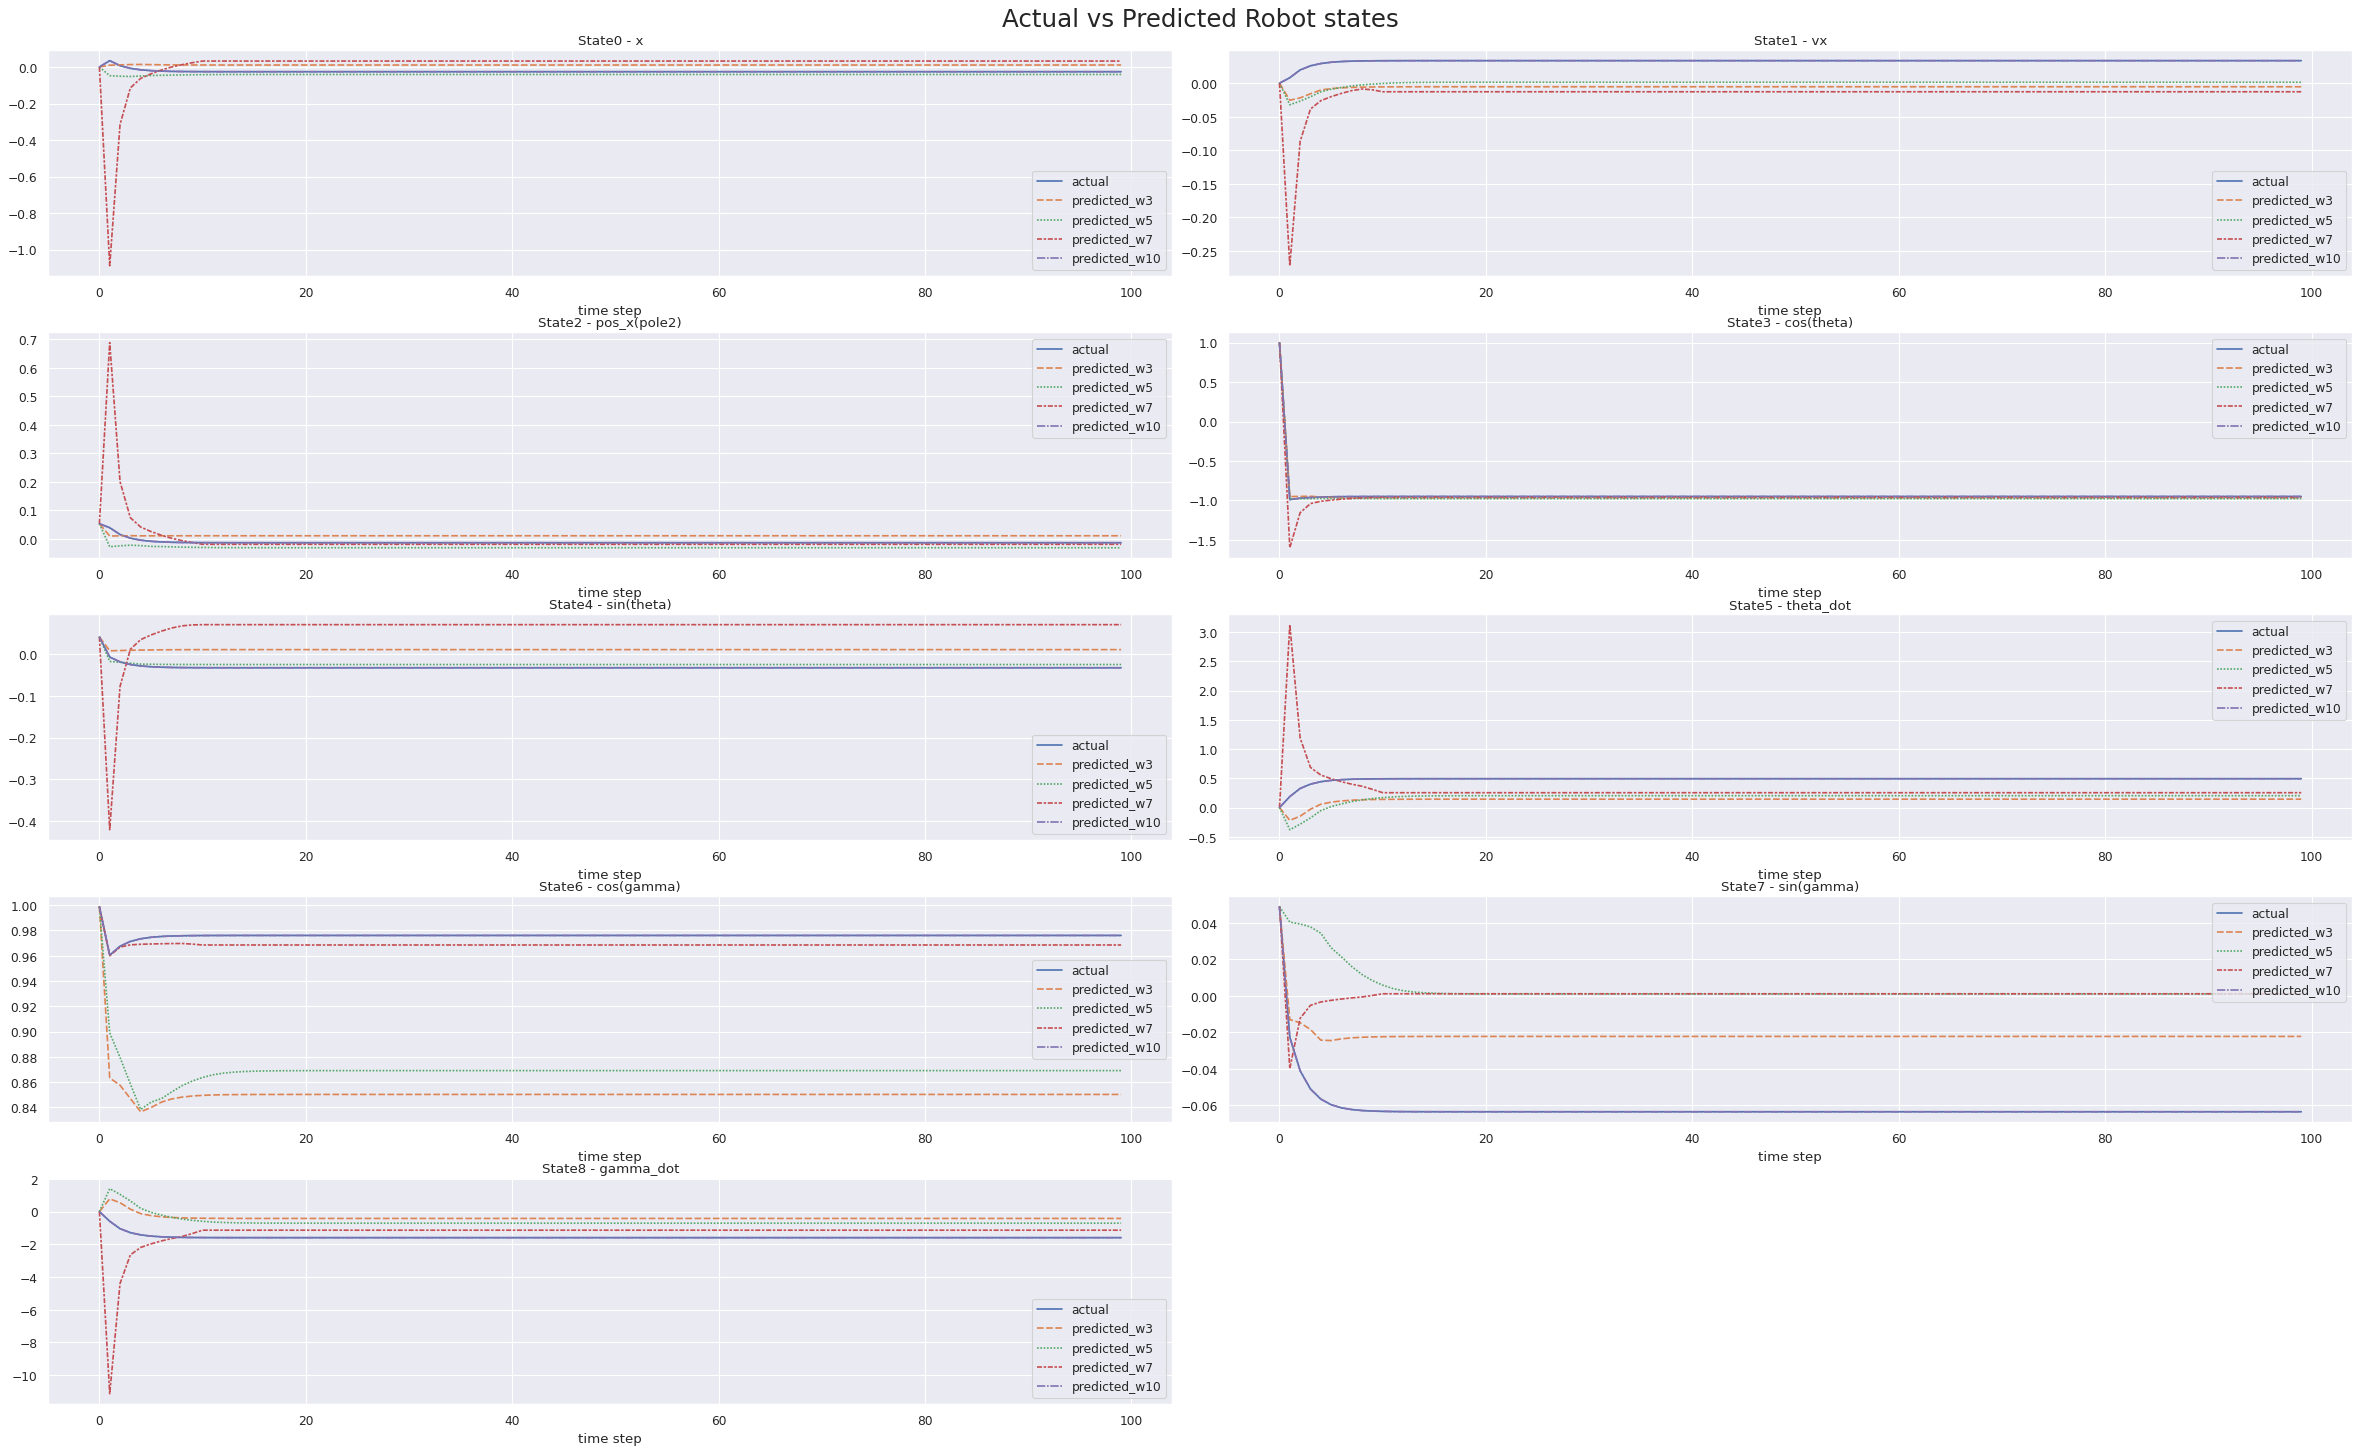

In [ ]:
actual_states = nul_action_actual
predicted_states = nul_action_results

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([actual_states[:,i], 
                                    #  predicted_states[0][:,i],
                                     predicted_states[1][:,i],
                                     predicted_states[2][:,i],
                                     predicted_states[3][:,i],
                                     predicted_states[4][:,i]]).T ,
                        columns=["actual", 
                                #  "predicted_w2", 
                                 "predicted_w3", 
                                 "predicted_w5", 
                                 "predicted_w7", 
                                 "predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Actual vs Predicted Robot states", fontsize=22)
plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_null_action_model2"))

plt.show()


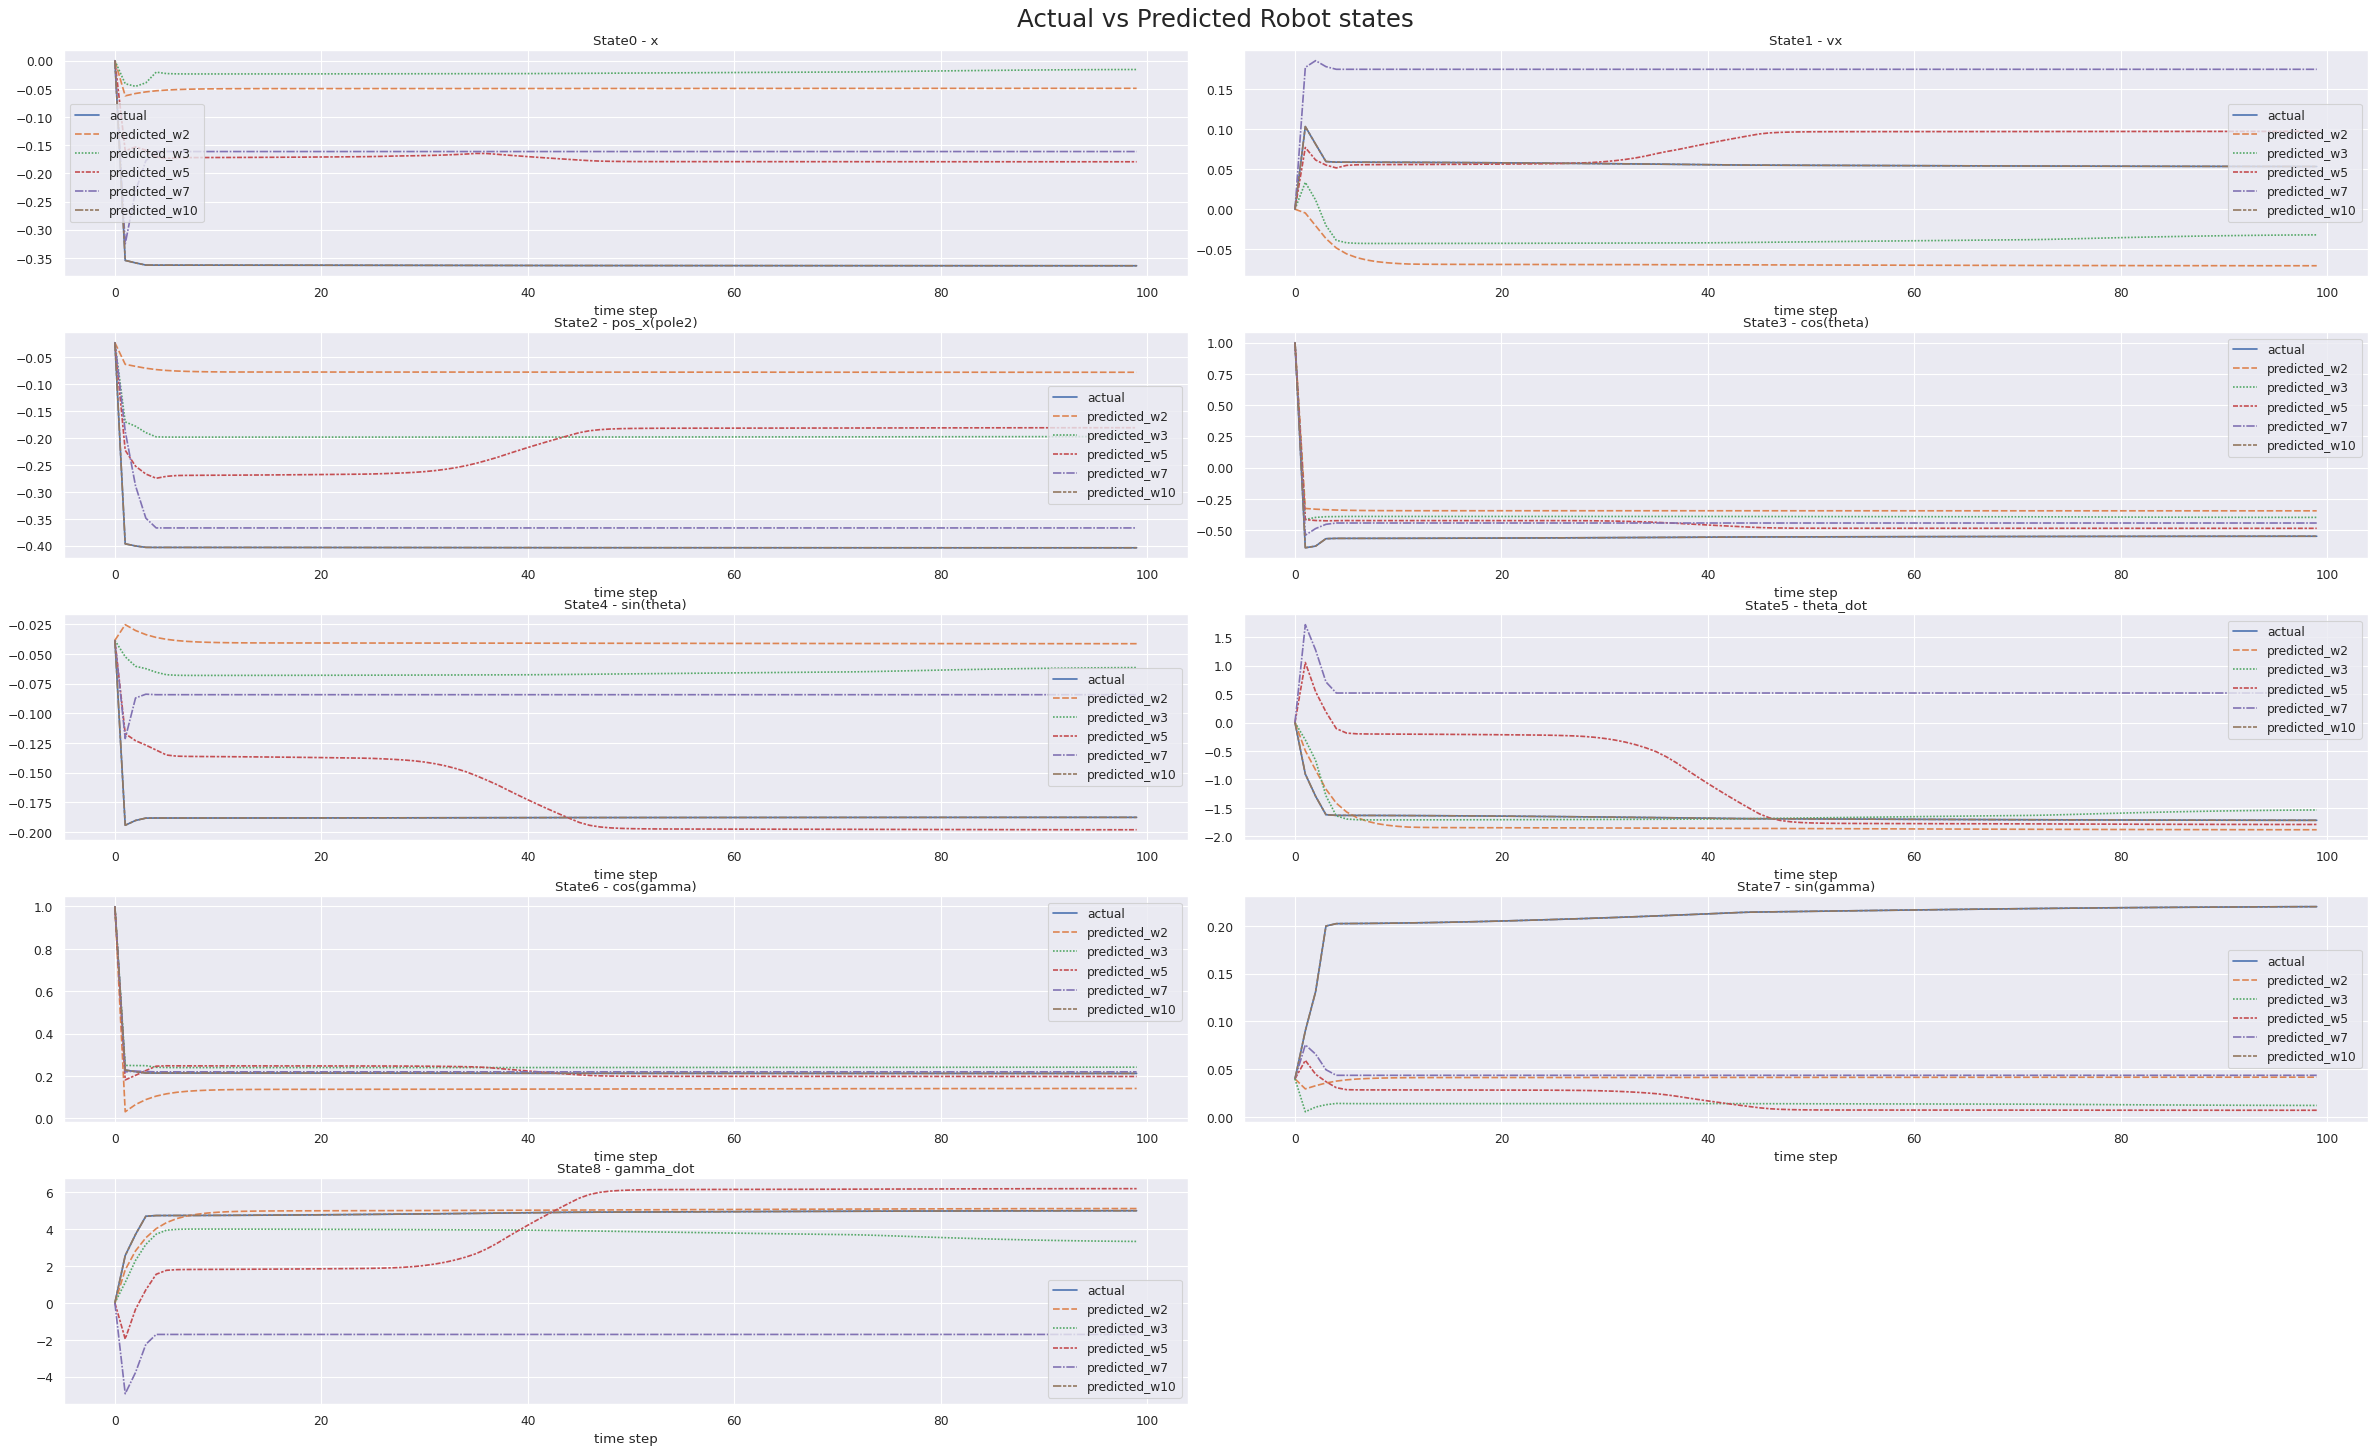

In [ ]:
actual_states = cos_action_actual
predicted_states = cos_action_results

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([actual_states[:,i], 
                                     predicted_states[0][:,i],
                                     predicted_states[1][:,i],
                                     predicted_states[2][:,i],
                                     predicted_states[3][:,i],
                                     predicted_states[4][:,i]]).T ,
                        columns=["actual", 
                                 "predicted_w2",
                                 "predicted_w3", 
                                 "predicted_w5", 
                                 "predicted_w7", 
                                 "predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Actual vs Predicted Robot states", fontsize=22)
plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_cos_action_model2"))

plt.show()


<Figure size 2400x1440 with 0 Axes>

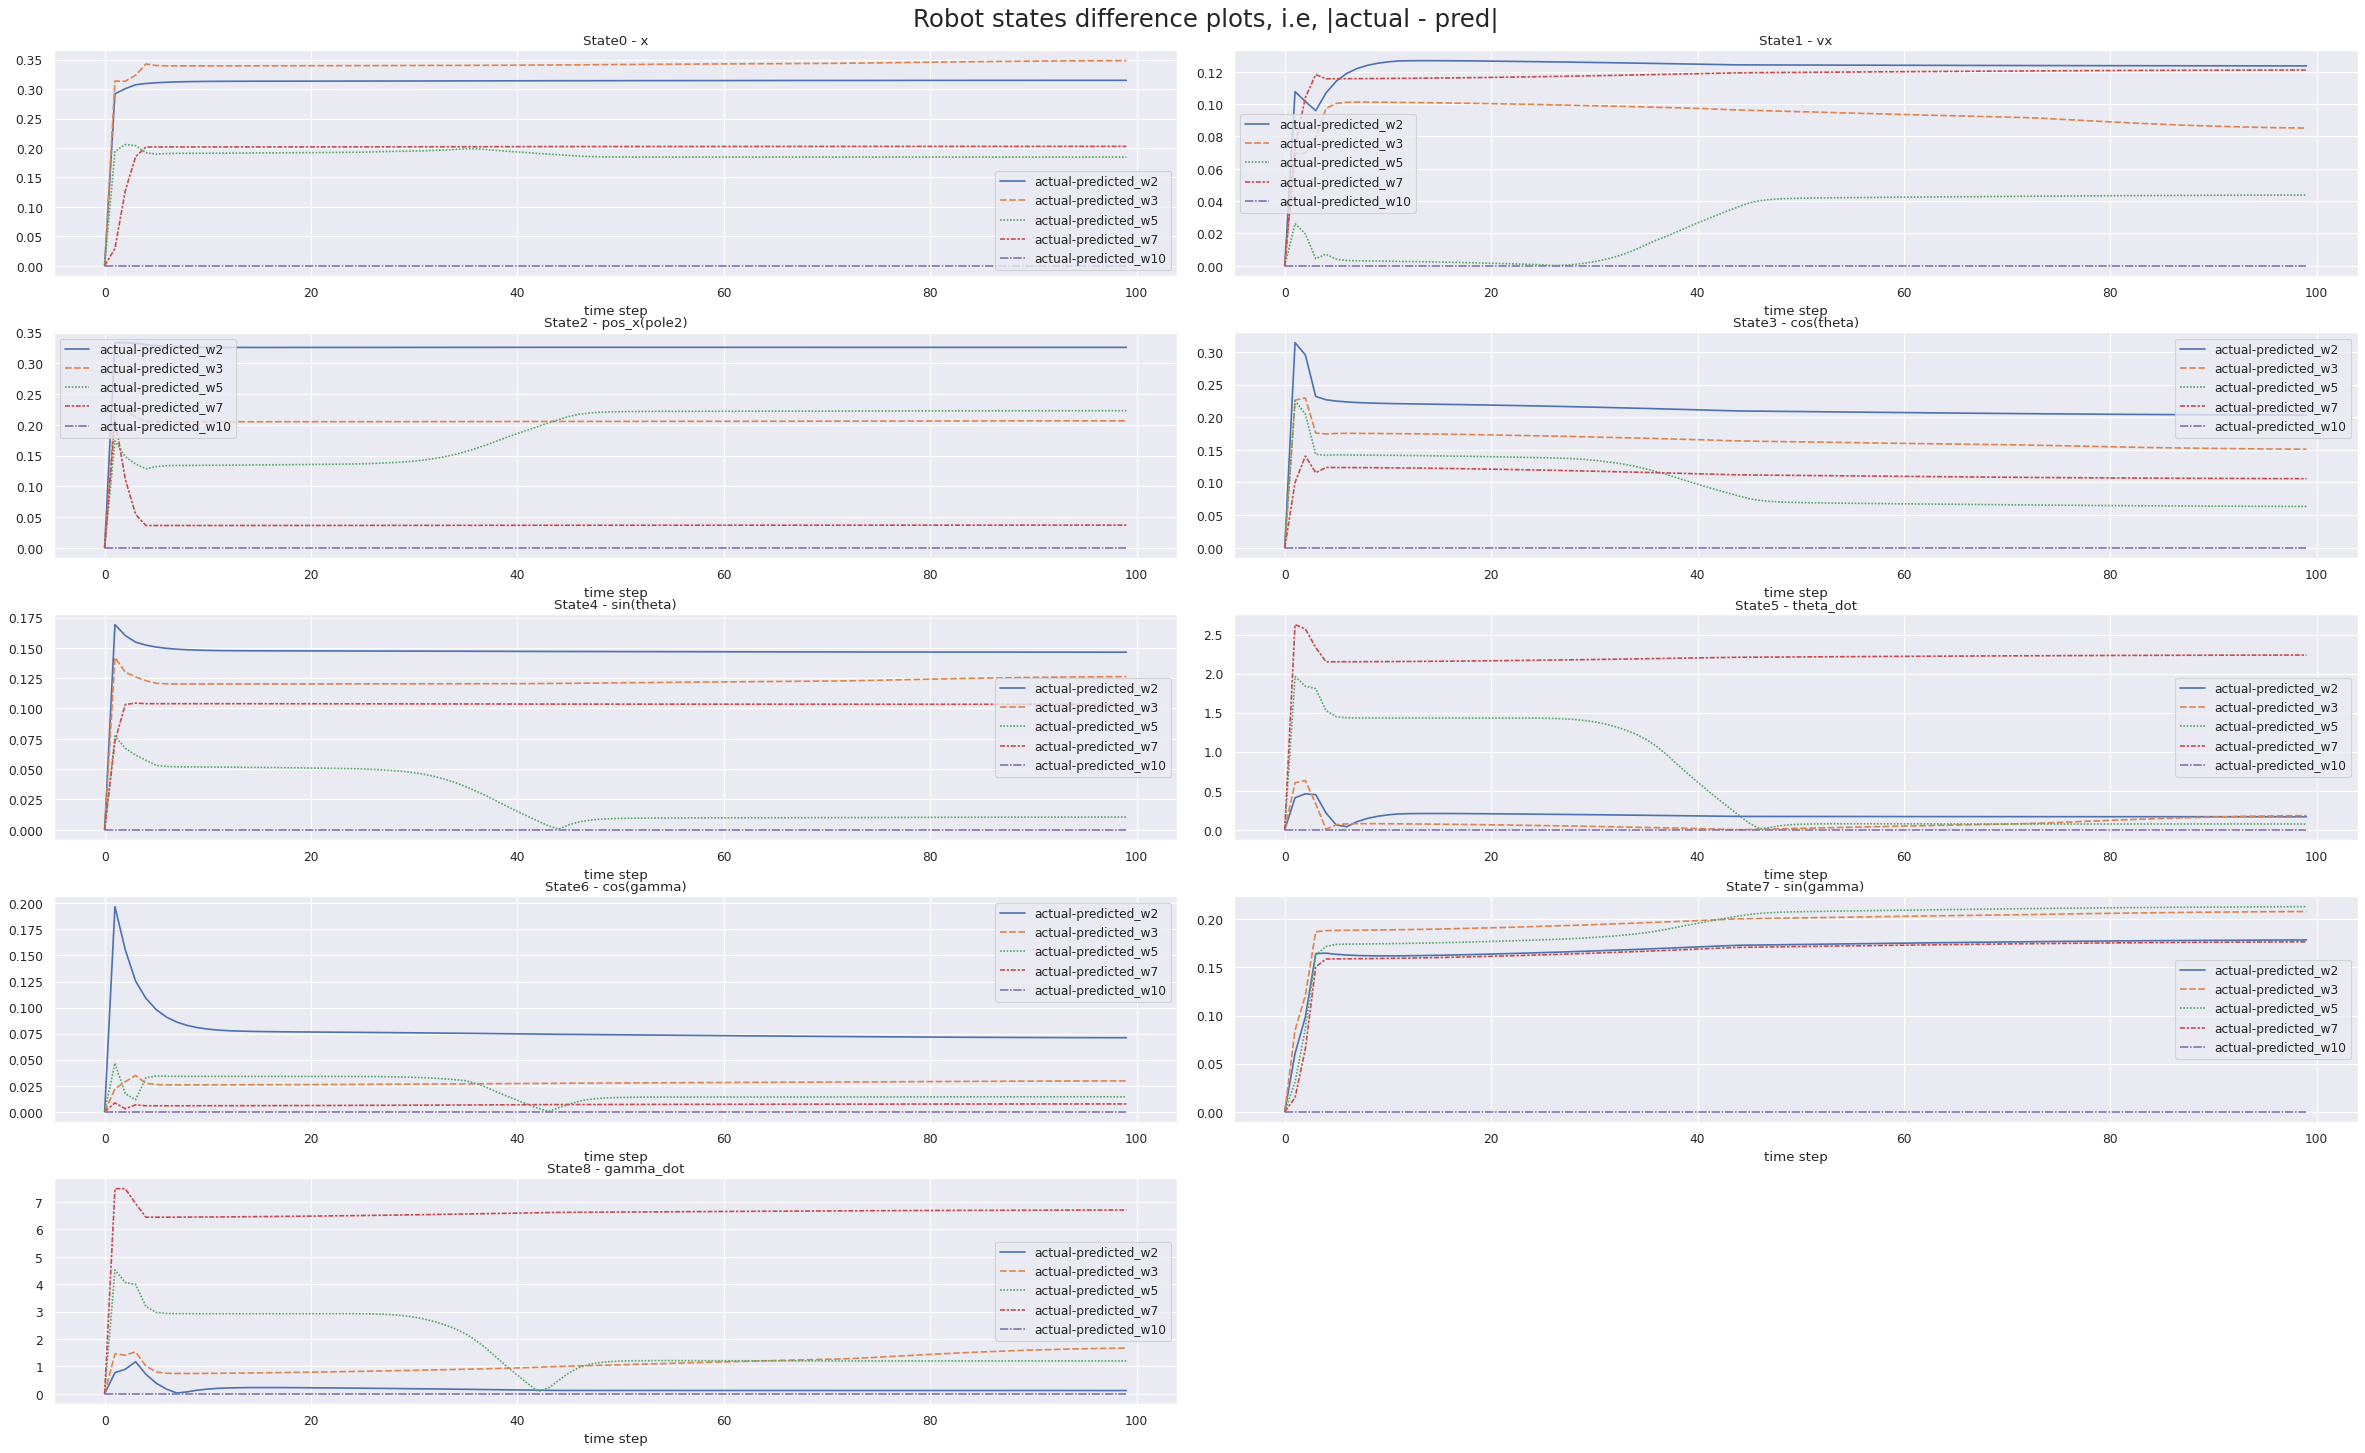

In [ ]:
plt.figure(num=None, figsize=(30, 18), dpi=80)

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([abs(actual_states[:,i] - predicted_states[0][:,i]),
                                     abs(actual_states[:,i] - predicted_states[1][:,i]),
                                     abs(actual_states[:,i] - predicted_states[2][:,i]),
                                     abs(actual_states[:,i] - predicted_states[3][:,i]),
                                     abs(actual_states[:,i] - predicted_states[4][:,i])]).T ,
                        columns=["actual-predicted_w2",
                                 "actual-predicted_w3", 
                                 "actual-predicted_w5", 
                                 "actual-predicted_w7", 
                                 "actual-predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Robot states difference plots, i.e, |actual - pred|", fontsize=22)
# plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_cos_action_model2"))

plt.show()



In [ ]:
PATH = "/content/gdrive/My Drive/Thesis/"

folder_list = os.listdir(PATH)
pred_dir_list = []
for i in range(len(folder_list)):
    if folder_list[i][:9] == "pred_data" and folder_list[i][16:20] == "2020": 
        pred_dir_list.append(folder_list[i])

for f in pred_dir_list:
    print(f)
    
print(len(pred_dir_list))

pred_data_27-01-2020_14.07.00
pred_data_27-01-2020_16.40.29
pred_data_27-01-2020_17.32.12
pred_data_27-01-2020_19.04.42
pred_data_27-01-2020_19.58.02
pred_data_27-01-2020_20.44.42
pred_data_27-01-2020_21.19.59
pred_data_28-01-2020_03.07.33
pred_data_28-01-2020_04.16.44
pred_data_28-01-2020_06.40.44
10


In [ ]:
nul_action_results = []
for i in range(5):
    file = os.listdir(os.path.join(PATH, pred_dir_list[i]))
    print(file)
    nul_action_results.append(np.load( os.path.join(PATH, pred_dir_list[i], file[1]) ))

nul_action_actual = np.load( os.path.join(PATH, pred_dir_list[i], file[0]) )

print(nul_action_actual.shape)

cos_action_results = []
for i in range(5,10):
    file = os.listdir(os.path.join(PATH, pred_dir_list[i]))
    print(file)
    cos_action_results.append(np.load( os.path.join(PATH, pred_dir_list[i], file[1]) ))

cos_action_actual = np.load( os.path.join(PATH, pred_dir_list[i], file[0]) )

print(cos_action_actual.shape)

['actual_states_w2.npy', 'pred_states2.npy']
['actual_states_w3.npy', 'pred_states3.npy']
['actual_states_w5.npy', 'pred_states5.npy']
['actual_states_w7.npy', 'pred_states7.npy']
['actual_states_w10.npy', 'pred_states10.npy']
(100, 9)
['actual_states_w2.npy', 'pred_states2.npy']
['actual_states_w3.npy', 'pred_states3.npy']
['actual_states_w5.npy', 'pred_states5.npy']
['actual_states_w7.npy', 'pred_states7.npy']
['actual_states_w10.npy', 'pred_states10.npy']
(100, 9)


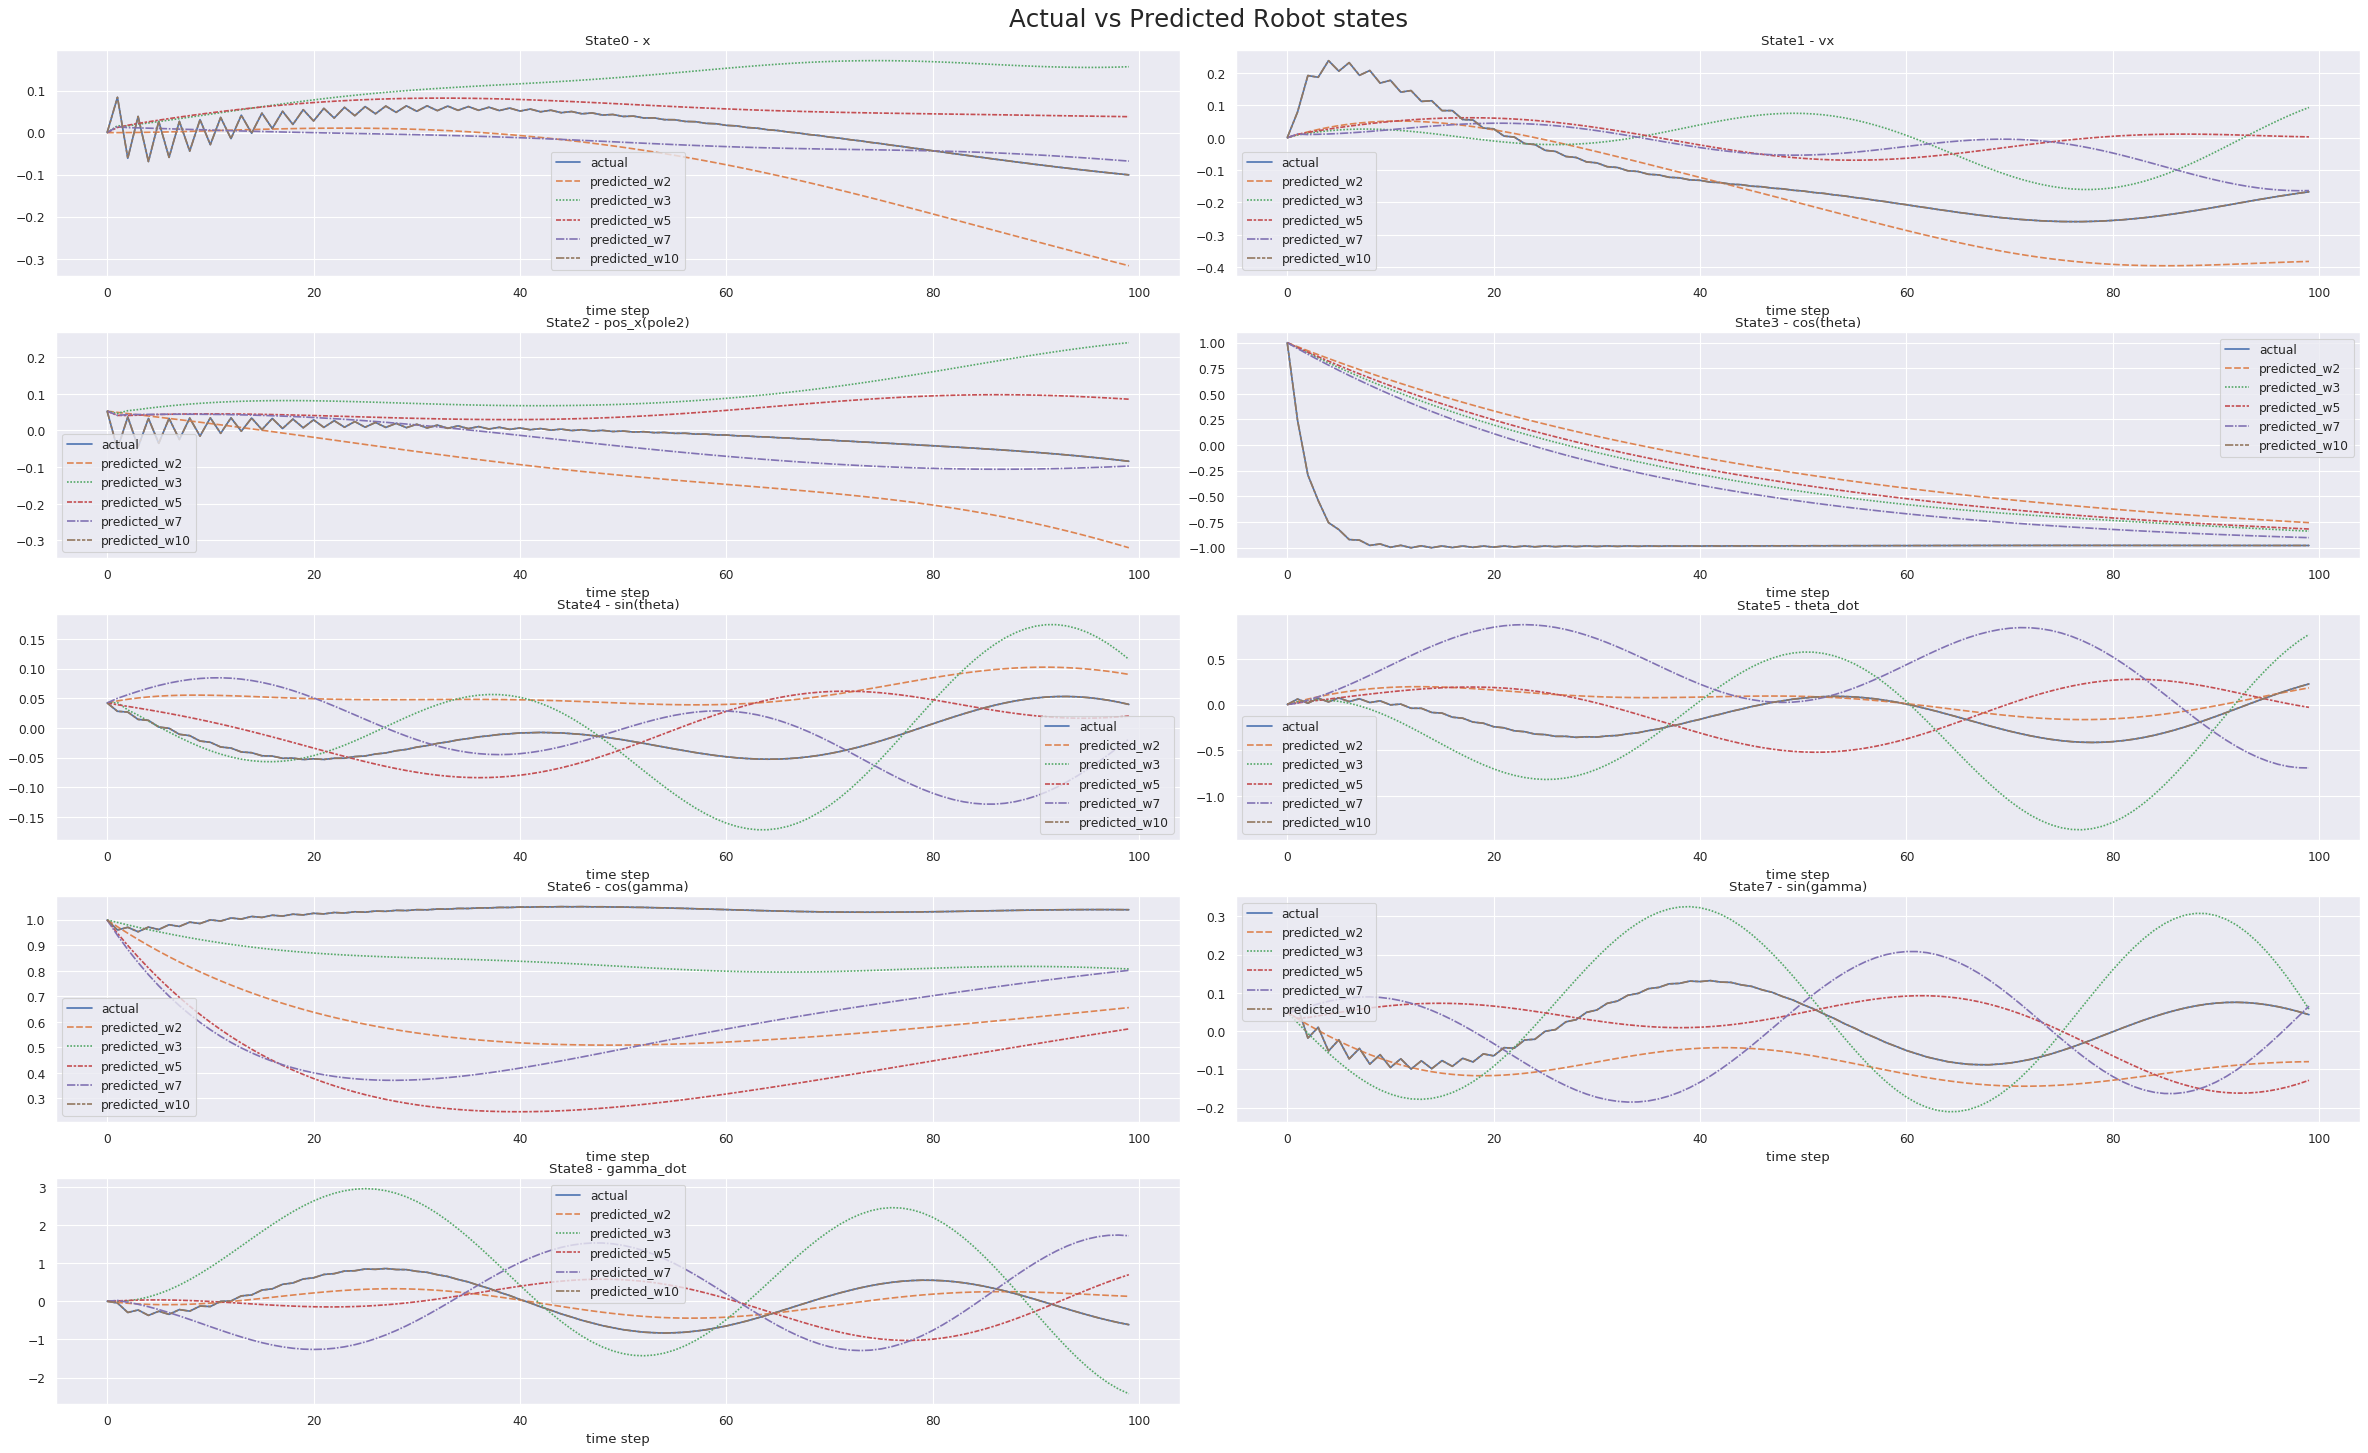

In [ ]:
actual_states = nul_action_actual
predicted_states = nul_action_results

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([actual_states[:,i], 
                                     predicted_states[0][:,i],
                                     predicted_states[1][:,i],
                                     predicted_states[2][:,i],
                                     predicted_states[3][:,i],
                                     predicted_states[4][:,i]]).T ,
                        columns=["actual", 
                                 "predicted_w2",
                                 "predicted_w3", 
                                 "predicted_w5", 
                                 "predicted_w7", 
                                 "predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Actual vs Predicted Robot states", fontsize=22)
# plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_null_action_model1"))

plt.show()


In [7]:
actual_states = cos_action_actual
predicted_states = cos_action_results

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([actual_states[:,i], 
                                     predicted_states[0][:,i],
                                     predicted_states[1][:,i],
                                     predicted_states[2][:,i],
                                     predicted_states[3][:,i],
                                     predicted_states[4][:,i]]).T ,
                        columns=["actual", 
                                 "predicted_w2",
                                 "predicted_w3", 
                                 "predicted_w5", 
                                 "predicted_w7", 
                                 "predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Actual vs Predicted Robot states", fontsize=22)
# plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_cos_action_model1"))

plt.show()


NameError: ignored

## $\Delta$s State Prediction Plots

In [26]:
PATH = "/content/gdrive/My Drive/Thesis/pred_data/delta_state_pred_data"

folder_list = os.listdir(PATH)
pred_dir_list = []
for i in range(len(folder_list)):
    if folder_list[i][:9] == "pred_data": 
        pred_dir_list.append(folder_list[i])

print(pred_dir_list)
print(len(pred_dir_list))

['pred_data_07-06-2020_22.29.13', 'pred_data_07-06-2020_22.30.13', 'pred_data_07-06-2020_22.30.40', 'pred_data_07-06-2020_22.31.03', 'pred_data_07-06-2020_22.31.23']
5


In [27]:
del_state_pred_results = []
for i in range(len(pred_dir_list)):
    files = os.listdir(os.path.join(PATH, pred_dir_list[i]))
    print(files)
    del_state_pred_results.append(np.load( os.path.join(PATH, pred_dir_list[i], files[1]) ))

del_state_pred_actual = np.load( os.path.join(PATH, pred_dir_list[i], files[0]) )

print(del_state_pred_actual.shape)
print(del_state_pred_results[0].shape)
print(len(del_state_pred_results))

['actual_states_w2.npy', 'pred_states2.npy']
['actual_states_w3.npy', 'pred_states3.npy']
['actual_states_w5.npy', 'pred_states5.npy']
['actual_states_w7.npy', 'pred_states7.npy']
['actual_states_w10.npy', 'pred_states10.npy']
(100, 9)
(100, 9)
5


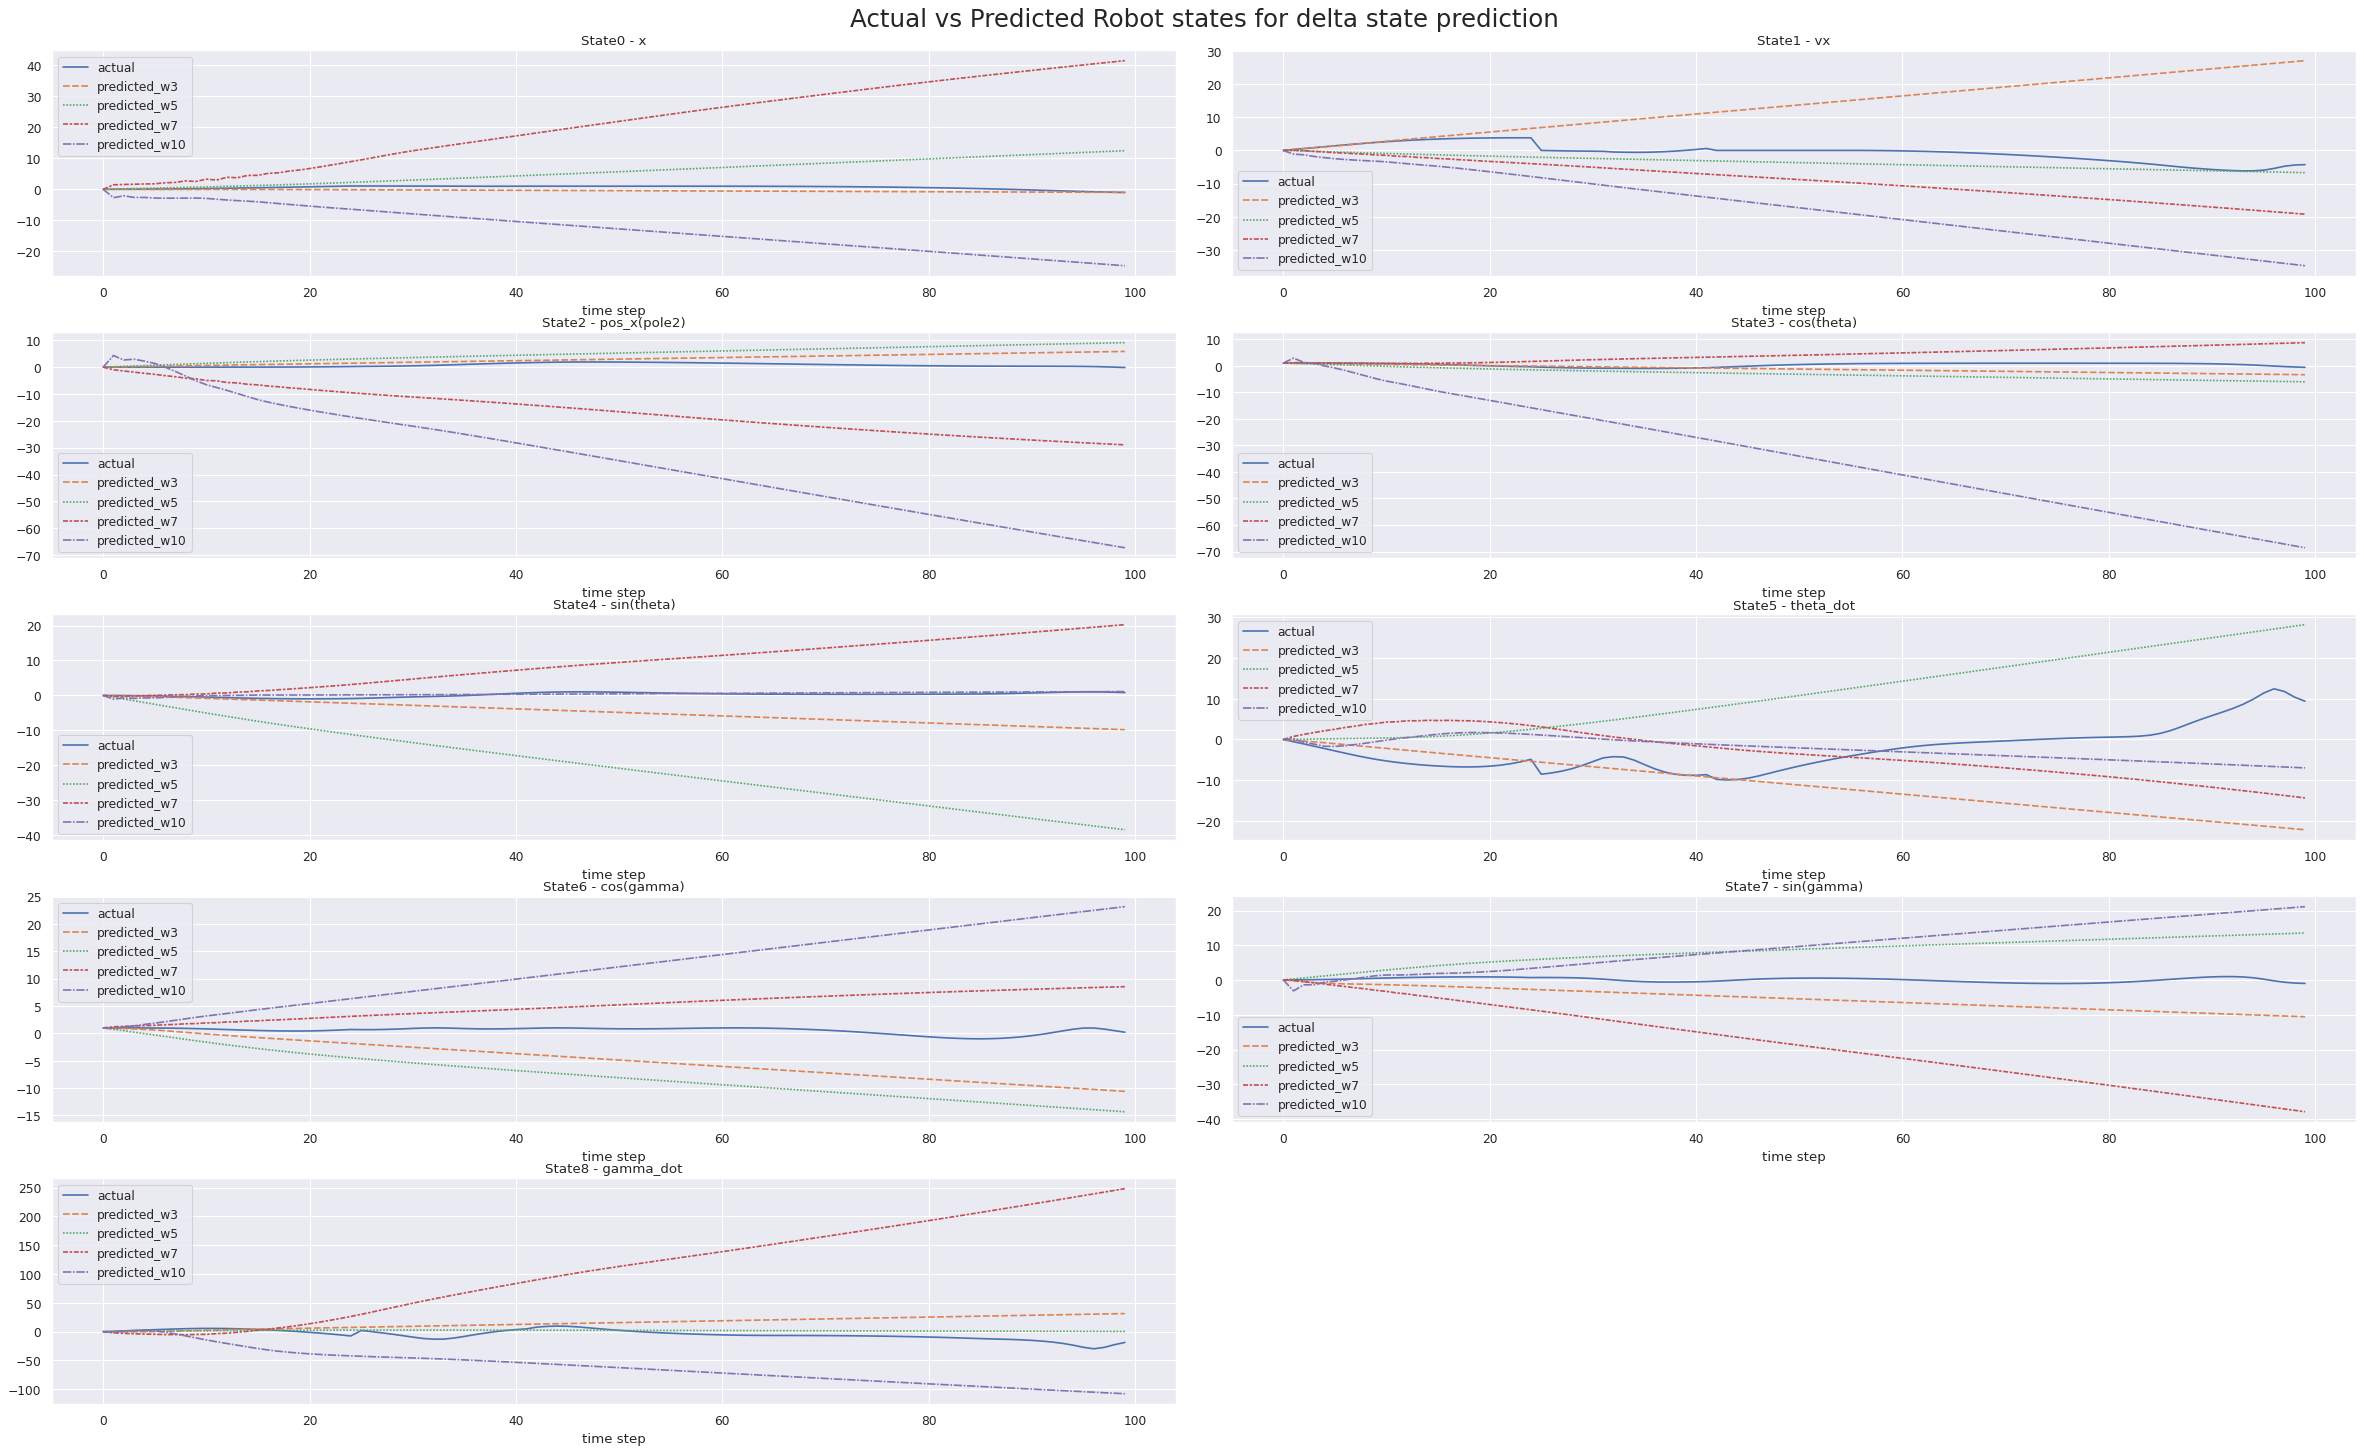

In [28]:
actual_states = del_state_pred_actual
predicted_states = del_state_pred_results

plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([actual_states[:,i], 
                                     predicted_states[1][:,i],
                                     predicted_states[2][:,i],
                                     predicted_states[3][:,i],
                                     predicted_states[4][:,i]]).T ,
                        columns=["actual", 
                                 "predicted_w3", 
                                 "predicted_w5", 
                                 "predicted_w7", 
                                 "predicted_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Actual vs Predicted Robot states for delta state prediction", fontsize=22)
# plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_delta_state_pred_model"))

plt.show()


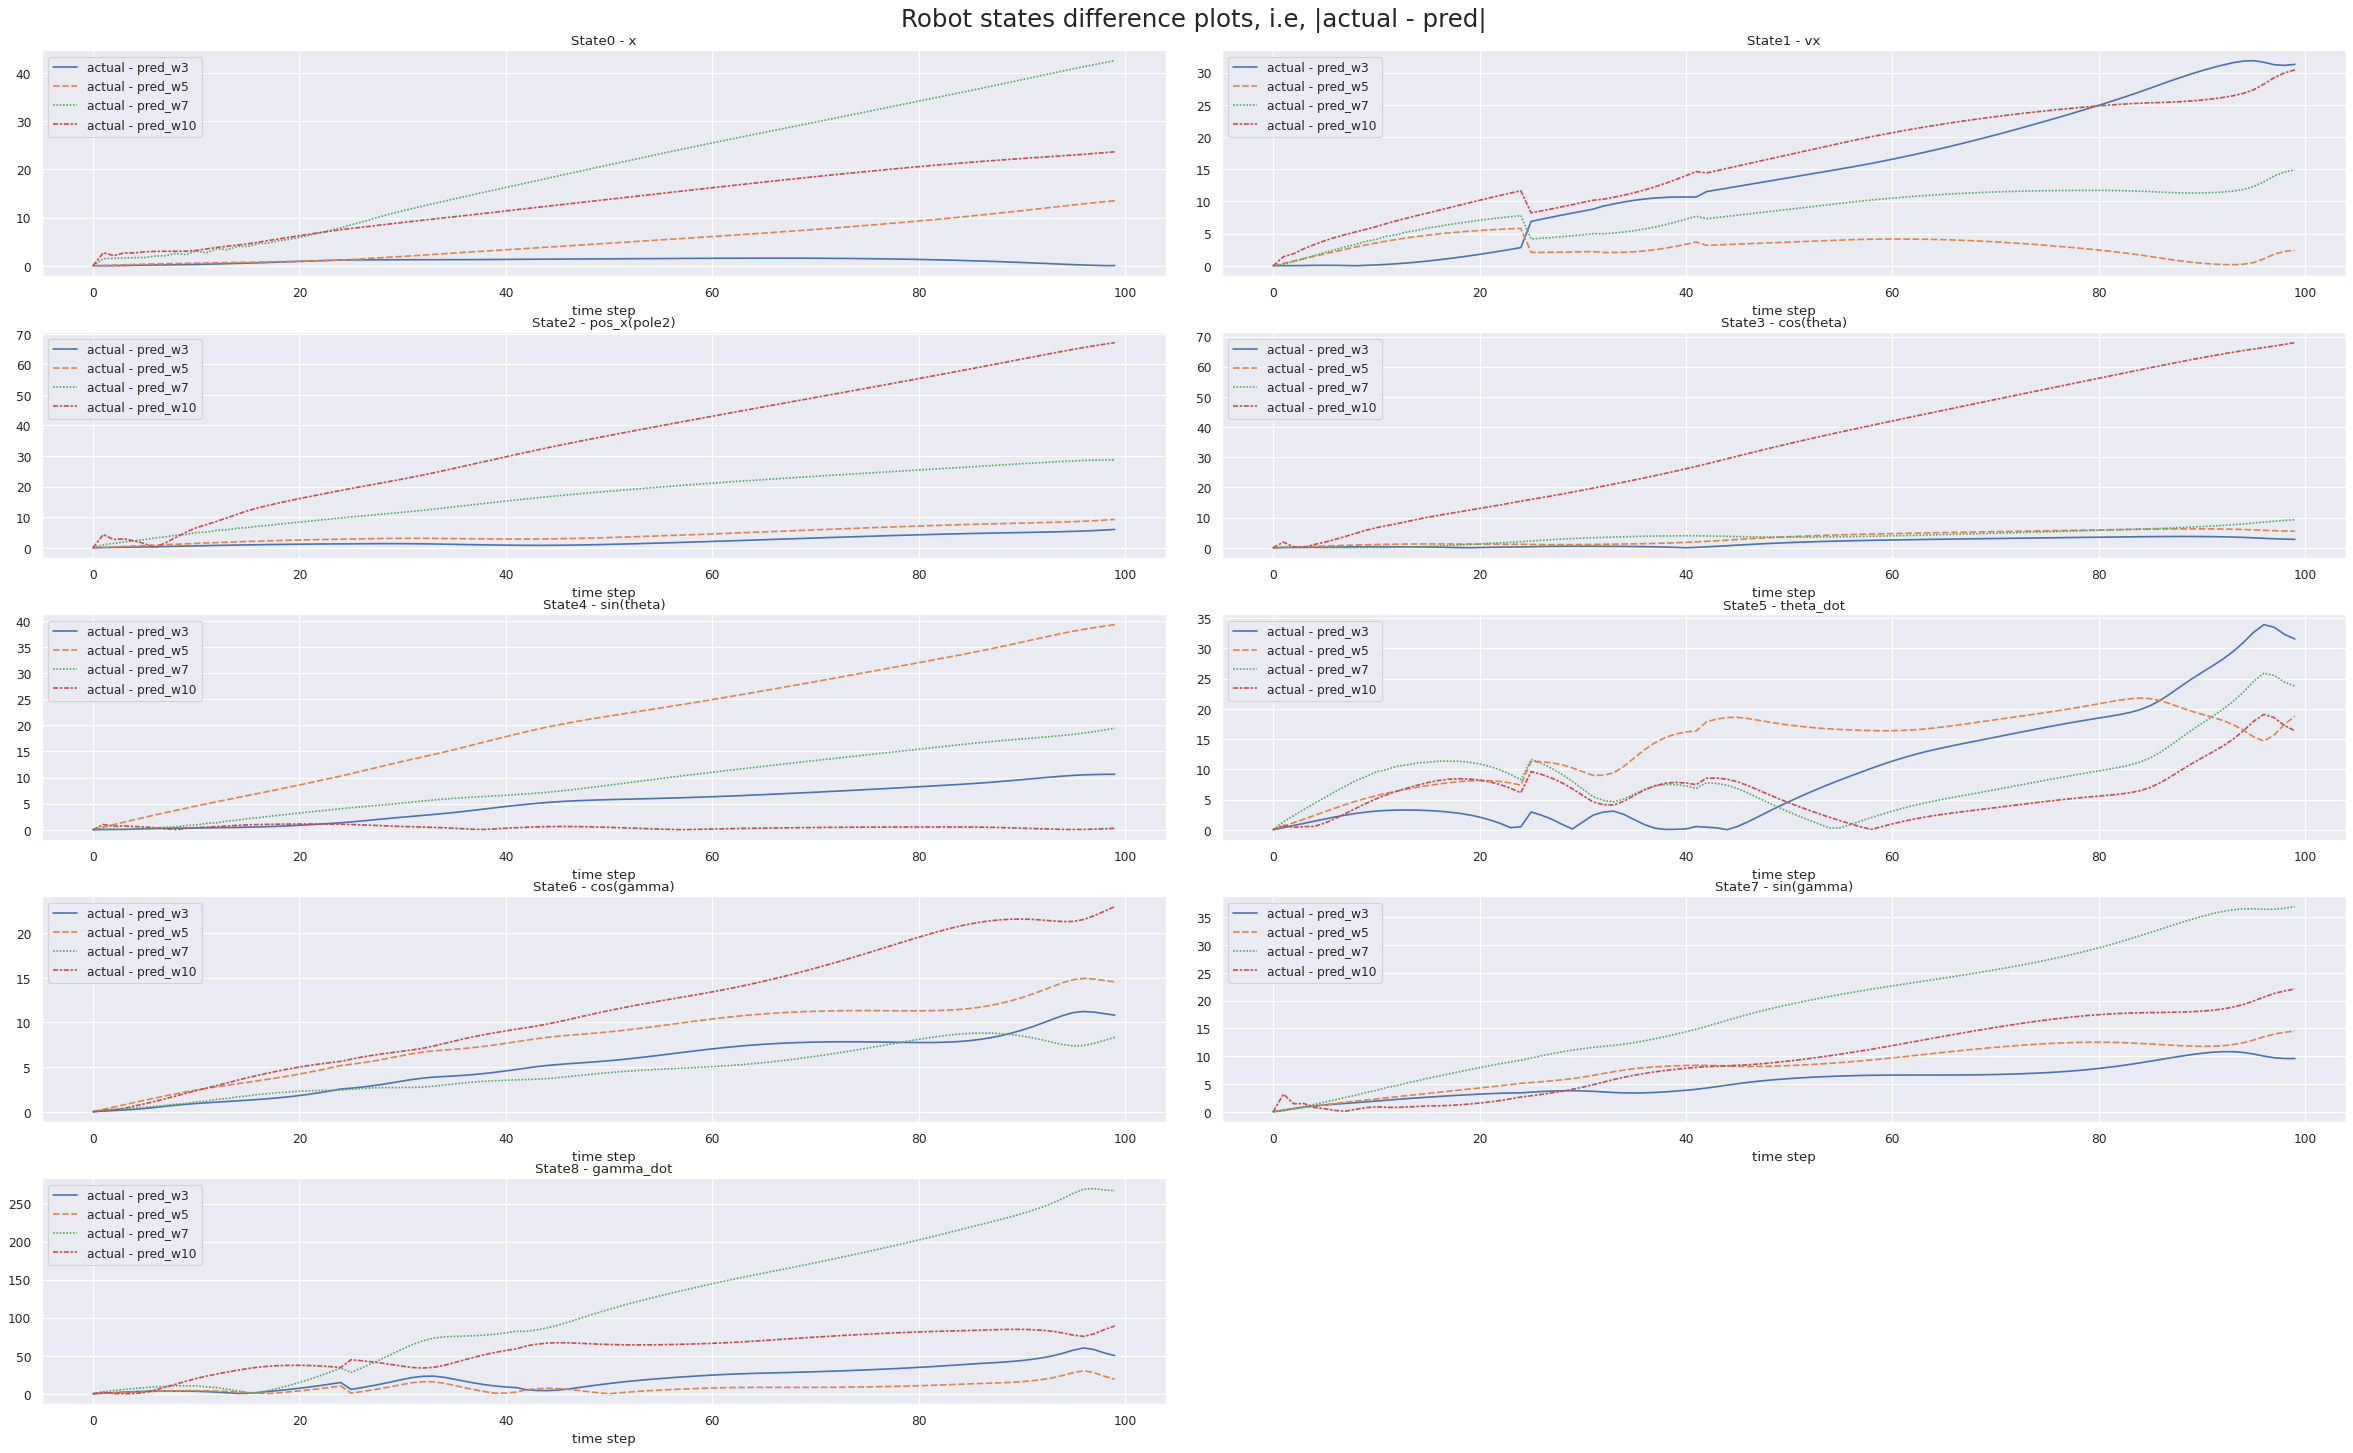

In [32]:
plt.figure(num=None, figsize=(30, 18), dpi=80)
        
num_states = int(actual_states.shape[1])
state_vec = ['x', 'vx', 'pos_x(pole2)',
            'cos(theta)', 'sin(theta)', 'theta_dot',
            'cos(gamma)', 'sin(gamma)', 'gamma_dot']
assert (num_states == len(state_vec) ), \
    "States insides actual_states/predicted_states do not match state_vec."

for i in range(num_states):
    plt.subplot(5,2,i+1)
    df = pd.DataFrame(data=np.array([abs(actual_states[:,i] - predicted_states[1][:,i]),
                                     abs(actual_states[:,i] - predicted_states[2][:,i]),
                                     abs(actual_states[:,i] - predicted_states[3][:,i]),
                                     abs(actual_states[:,i] - predicted_states[4][:,i])]).T ,
                        columns=["actual - pred_w3", 
                                 "actual - pred_w5", 
                                 "actual - pred_w7", 
                                 "actual - pred_w10"])
    
    fig = sns.lineplot(data=df)
    plt.xlabel("time step")
    plt.title("State{} - {}".format(i, state_vec[i]), fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.01, left=0.02 , right=0.98 , hspace=0.25, wspace=0.05)
plt.suptitle("Robot states difference plots, i.e, |actual - pred|", fontsize=22)
# plt.savefig(os.path.join(PATH,'figures', "AvsP_plots_cos_action_model2"))

plt.show()